# N-BEATS: Neural basis expansion analysis for interpretable time series forecasting (https://arxiv.org/abs/1905.10437)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [4]:
# Generate synthetic data (e.g., sinusoidal sequences)
def generate_data(seq_len=30, horizon=5, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        freq = np.random.rand() * 0.5 + 0.1
        x_seq = np.sin(np.linspace(start, start + freq * seq_len, seq_len))
        y_seq = np.sin(np.linspace(start + freq * seq_len, start + freq * (seq_len + horizon), horizon))
        X.append(x_seq)
        y.append(y_seq)
    return np.array(X), np.array(y)

In [5]:
# Create dataset
seq_len, horizon = 30, 5
X, y = generate_data(seq_len, horizon)
X_train, X_val, y_train, y_val = X[:800], X[800:], y[:800], y[800:]

In [6]:
# Define a single N-BEATS block (fully connected basis block)
def nbeats_block(input_shape, hidden_units=128):
    x_input = Input(shape=input_shape)
    x = Dense(hidden_units, activation='relu')(x_input)
    x = Dense(hidden_units, activation='relu')(x)
    backcast = Dense(input_shape[0], name='backcast')(x)
    forecast = Dense(horizon, name='forecast')(x)
    model = Model(inputs=x_input, outputs=forecast)
    return model

In [7]:
model = nbeats_block((seq_len,))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.4136 - mae: 0.5615 - val_loss: 0.1414 - val_mae: 0.3034
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1149 - mae: 0.2659 - val_loss: 0.0473 - val_mae: 0.1638
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0404 - mae: 0.1494 - val_loss: 0.0162 - val_mae: 0.0931
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mae: 0.0841 - val_loss: 0.0084 - val_mae: 0.0668
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mae: 0.0629 - val_loss: 0.0043 - val_mae: 0.0486


In [9]:
# Evaluate the model
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mae: 0.0504 
Validation MAE: 0.0486


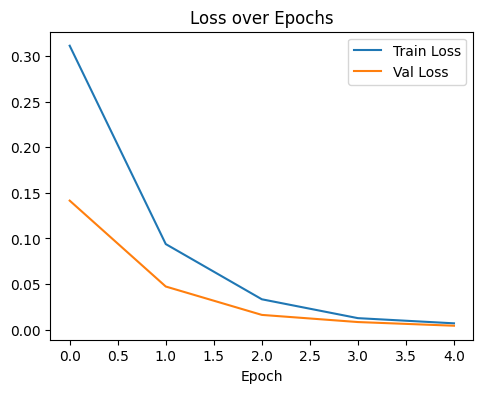

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.legend()

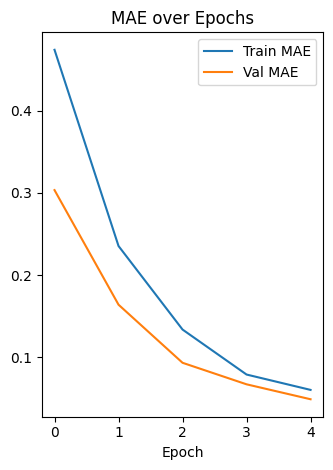

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


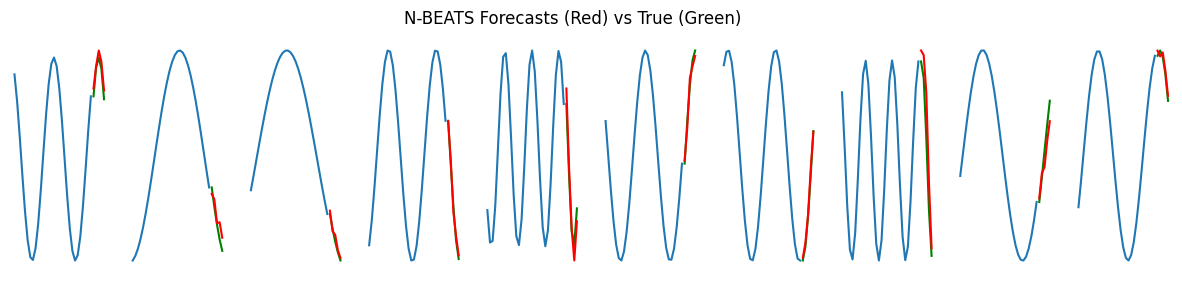

In [12]:
# Visualize predictions
preds = model.predict(X_val[:10])
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.plot(range(seq_len), X_val[i], label='Input')
    plt.plot(range(seq_len, seq_len + horizon), y_val[i], label='True', color='green')
    plt.plot(range(seq_len, seq_len + horizon), preds[i], label='Pred', color='red')
    plt.axis('off')
plt.suptitle('N-BEATS Forecasts (Red) vs True (Green)')
plt.show()
